# 1. Importing Neccessary Libraries

In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2.loading datasets


In [4]:
df = pd.read_csv("mysongs_test.csv")

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# 3.understanding dataset

In [5]:
df.shape

(179, 16)

In [6]:
df.head()

,Unnamed: 0,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,Nota,Ano de Lançamento,País
0,0,The Black Parade,0.106689,0.383714,0.801571,0.001833,0.208550,-4.228071,0.079036,138.339214,0.360000,222664.785714,3.928571,9.500,2006,EUA
1,1,An Evening With Silk Sonic,0.053501,0.662400,0.611200,0.000079,0.237810,-9.090100,0.057100,116.022300,0.662100,218689.500000,4.000000,9.500,2021,EUA
2,2,A Tábua de Esmeralda,0.545583,0.631583,0.570500,0.005155,0.194017,-13.686333,0.044667,123.820750,0.913917,201416.666667,3.916667,9.289,1974,Brasil
3,3,By The Way,0.051219,0.522833,0.826667,0.000690,0.186006,-3.970167,0.060567,120.965389,0.396167,255129.611111,4.000000,9.200,2002,EUA
4,4,Entren Los Que Quieran,0.333014,0.615000,0.721414,0.027082,0.221707,-7.195429,0.127800,115.417857,0.612914,225124.714286,3.857143,9.167,2010,Porto-Rico


In [7]:
df.head()

,Unnamed: 0,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,Nota,Ano de Lançamento,País
0,0,The Black Parade,0.106689,0.383714,0.801571,0.001833,0.208550,-4.228071,0.079036,138.339214,0.360000,222664.785714,3.928571,9.500,2006,EUA
1,1,An Evening With Silk Sonic,0.053501,0.662400,0.611200,0.000079,0.237810,-9.090100,0.057100,116.022300,0.662100,218689.500000,4.000000,9.500,2021,EUA
2,2,A Tábua de Esmeralda,0.545583,0.631583,0.570500,0.005155,0.194017,-13.686333,0.044667,123.820750,0.913917,201416.666667,3.916667,9.289,1974,Brasil
3,3,By The Way,0.051219,0.522833,0.826667,0.000690,0.186006,-3.970167,0.060567,120.965389,0.396167,255129.611111,4.000000,9.200,2002,EUA
4,4,Entren Los Que Quieran,0.333014,0.615000,0.721414,0.027082,0.221707,-7.195429,0.127800,115.417857,0.612914,225124.714286,3.857143,9.167,2010,Porto-Rico


In [8]:
df.describe()

,Unnamed: 0,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,Nota,Ano de Lançamento
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,1.790000e+02,179.000000,179.000000,179.000000
mean,89.000000,0.280326,0.549247,0.625893,0.106127,0.205108,-8.306267,0.093228,119.513088,0.490452,2.295137e+05,3.883258,7.810564,2004.229050
std,51.816986,0.232201,0.122891,0.185520,0.177949,0.109999,3.727979,0.082215,14.898347,0.171662,9.368768e+04,0.264036,0.844494,15.736526
min,0.000000,0.000076,0.203000,0.048600,0.000000,0.080064,-28.527000,0.024100,36.641000,0.039900,8.289400e+04,1.000000,4.600000,1966.000000
25%,44.500000,0.084057,0.472633,0.504637,0.001387,0.145874,-9.664498,0.041843,113.182783,0.364840,1.896227e+05,3.833333,7.236000,1994.500000
50%,89.000000,0.241280,0.552909,0.636643,0.031764,0.178113,-7.513818,0.061608,118.699167,0.487187,2.248027e+05,3.928571,8.000000,2010.000000
75%,133.500000,0.426741,0.643952,0.776717,0.133769,0.234723,-5.931923,0.105854,125.213915,0.612722,2.483432e+05,4.000000,8.428000,2017.000000
max,178.000000,0.985852,0.808364,0.961647,0.872000,0.839400,-1.818140,0.486000,199.818000,0.913917,1.269542e+06,4.142857,9.500000,2022.000000


In [9]:
dict = {}
for col in df.columns:
    dict[col] = df[col].value_counts().shape[0]

pd.DataFrame(dict, index=['unique value count']).transpose()

,unique value count
Unnamed: 0,179
album,179
acousticness,179
danceability,179
energy,178
instrumentalness,177
liveness,179
loudness,179
speechiness,179
tempo,179


# 3.1 Checking Null values of the dataset

In [10]:
df.isnull().sum()

Unnamed: 0           0
album                0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
tempo                0
valence              0
duration_ms          0
time_signature       0
Nota                 0
Ano de Lançamento    0
País                 0
dtype: int64

In [11]:
df.isnull().sum()

Unnamed: 0           0
album                0
acousticness         0
danceability         0
energy               0
instrumentalness     0
liveness             0
loudness             0
speechiness          0
tempo                0
valence              0
duration_ms          0
time_signature       0
Nota                 0
Ano de Lançamento    0
País                 0
dtype: int64

OBSERVATIONS
​
There are around 179 rows & 15 columns.
There are No null values present in the dataset.
Majority of the columns in the dataset are Numerical in nature.
​
There are 22 different countries.We can make an analysis based on location.

CATEGORICAL COLUMNS
​
1.   album
2.  Ano de Lançamento
3.  País

NUMERICAL COLUMNS
1.   acousticness       
2.   danceability       
3.   energy             
4.   instrumentalness   
5.   liveness           
6.   loudness           
7.   speechiness        
8.   tempo              
9.   valence            
10.  duration_ms        
11.  time_signature     
12.  Nota          

In [26]:
df.head()

,Unnamed: 0,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,Nota,ReleaseYear,Country
0,0,The Black Parade,0.106689,0.383714,0.801571,0.001833,0.208550,-4.228071,0.079036,138.339214,0.360000,222664.785714,3.928571,9.500,2006,EUA
1,1,An Evening With Silk Sonic,0.053501,0.662400,0.611200,0.000079,0.237810,-9.090100,0.057100,116.022300,0.662100,218689.500000,4.000000,9.500,2021,EUA
2,2,A Tábua de Esmeralda,0.545583,0.631583,0.570500,0.005155,0.194017,-13.686333,0.044667,123.820750,0.913917,201416.666667,3.916667,9.289,1974,Brasil
3,3,By The Way,0.051219,0.522833,0.826667,0.000690,0.186006,-3.970167,0.060567,120.965389,0.396167,255129.611111,4.000000,9.200,2002,EUA
4,4,Entren Los Que Quieran,0.333014,0.615000,0.721414,0.027082,0.221707,-7.195429,0.127800,115.417857,0.612914,225124.714286,3.857143,9.167,2010,Other


# 3.2 Exploring Countries

In [12]:
#Rename País to Country
df.rename(columns={'País': 'Country'}, inplace=True)

In [13]:
#Rename Ano de Lançamento to Release Year
df.rename(columns={'Ano de Lançamento': 'ReleaseYear'}, inplace=True)

In [14]:
df["Country"].value_counts()

EUA                    90
Brasil                 46
UK                     20
França                  2
Porto-Rico              2
Argentina               2
Japão                   2
Nova Zelândia           1
Irlanda                 1
Espanha                 1
Coréia                  1
Canadá                  1
Itália                  1
Jamaica                 1
UK, Austrália e EUA     1
Rep. Tcheca             1
Ireland                 1
Holanda                 1
Colômbia                1
Irlanda / EUA           1
Wales (UK)              1
Armênia                 1
Name: Country, dtype: int64

It seems like we only have 3 major country count, so we can categorize it:
1. EUA
2. Brasil
3. UK
4. Other

In [15]:
df["Country"] = df["Country"].map({"Brasil":"Brasil", "EUA":"EUA","UK":"UK"}).fillna("Other")

In [16]:
df.head()

,Unnamed: 0,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,time_signature,Nota,ReleaseYear,Country
0,0,The Black Parade,0.106689,0.383714,0.801571,0.001833,0.208550,-4.228071,0.079036,138.339214,0.360000,222664.785714,3.928571,9.500,2006,EUA
1,1,An Evening With Silk Sonic,0.053501,0.662400,0.611200,0.000079,0.237810,-9.090100,0.057100,116.022300,0.662100,218689.500000,4.000000,9.500,2021,EUA
2,2,A Tábua de Esmeralda,0.545583,0.631583,0.570500,0.005155,0.194017,-13.686333,0.044667,123.820750,0.913917,201416.666667,3.916667,9.289,1974,Brasil
3,3,By The Way,0.051219,0.522833,0.826667,0.000690,0.186006,-3.970167,0.060567,120.965389,0.396167,255129.611111,4.000000,9.200,2002,EUA
4,4,Entren Los Que Quieran,0.333014,0.615000,0.721414,0.027082,0.221707,-7.195429,0.127800,115.417857,0.612914,225124.714286,3.857143,9.167,2010,Other


<AxesSubplot:xlabel='Country', ylabel='count'>

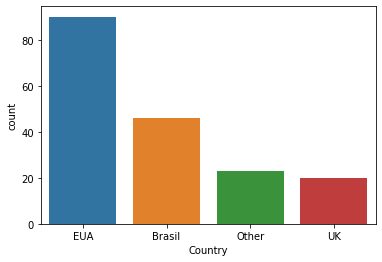

In [17]:
sns.countplot(x="Country", data=df)

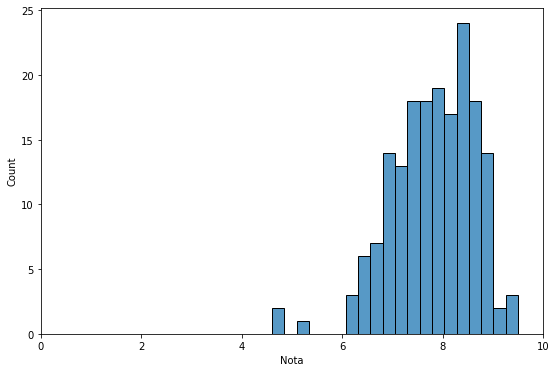

In [18]:
# Distribution of the points
plt.figure(figsize=(9, 6))
plt.xticks = range(0,10,1)
plt.xlim(0,10)
sns.histplot(x="Nota", data=df,bins=20);

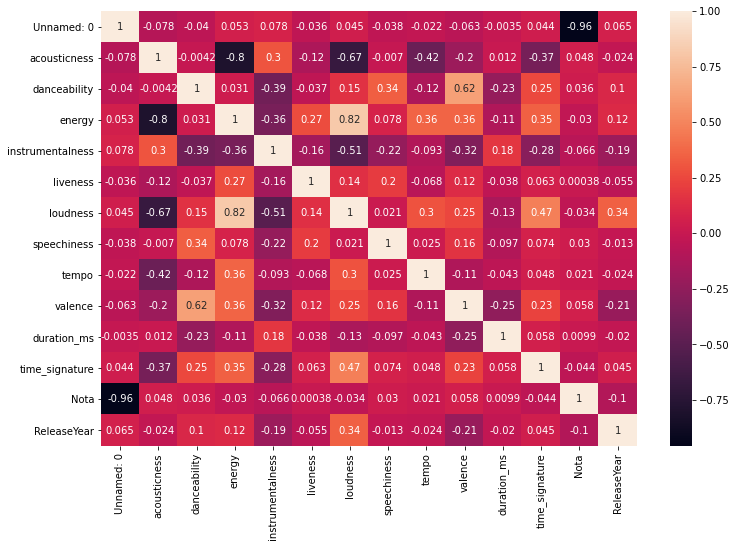

In [19]:
#correlation of data
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True);

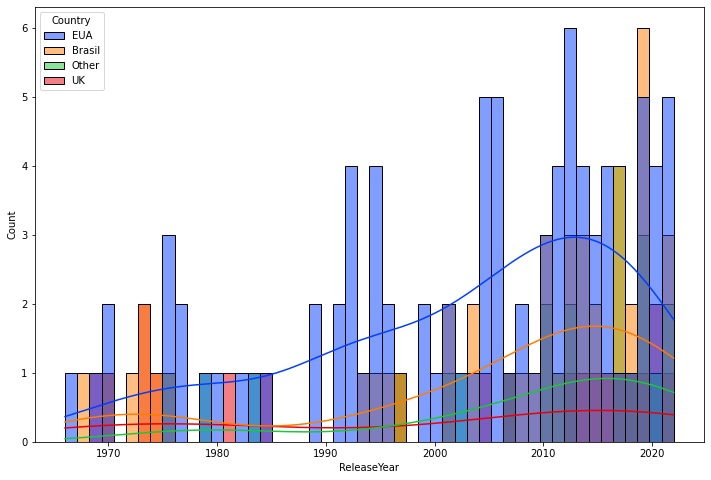

In [20]:
# Amount of songs per country by year
plt.figure(figsize=(12, 8))
sns.histplot(x="ReleaseYear", hue="Country" , data=df,bins=50,kde=True,palette="bright");

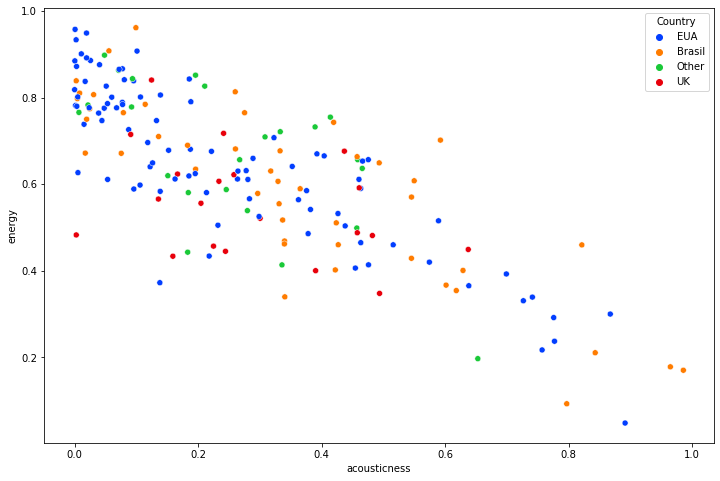

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="acousticness", y="energy",hue="Country" , data=df,palette="bright");

Albums from EAU are not acoustic generally. Also, more acoustic albums has lower energy.